In [2]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Load the Ether price data from a CSV file
data = pd.read_csv("ETH-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-09,151.224396,151.913940,147.621368,148.225174,148.225174,6744206747
1,2019-12-10,148.179855,148.564468,144.907959,146.267044,146.267044,6859512025
2,2019-12-11,146.320648,147.139206,143.045364,143.608002,143.608002,7037180049
3,2019-12-12,143.615662,145.751648,141.436981,145.604004,145.604004,7890383413
4,2019-12-13,145.655685,145.857101,143.746521,144.944748,144.944748,7264810247
...,...,...,...,...,...,...,...
1092,2022-12-05,1279.998901,1302.237549,1252.472412,1259.676758,1259.676758,6120359523
1093,2022-12-06,1259.854248,1271.923218,1247.629883,1271.653809,1271.653809,5089212680
1094,2022-12-07,1271.553101,1272.694092,1224.447998,1232.437500,1232.437500,5752205180
1095,2022-12-08,1232.451782,1286.229736,1226.358521,1281.116333,1281.116333,6227269815


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data = data.set_index('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,151.224396,151.913940,147.621368,148.225174,148.225174,6744206747
2019-12-10,148.179855,148.564468,144.907959,146.267044,146.267044,6859512025
2019-12-11,146.320648,147.139206,143.045364,143.608002,143.608002,7037180049
2019-12-12,143.615662,145.751648,141.436981,145.604004,145.604004,7890383413
2019-12-13,145.655685,145.857101,143.746521,144.944748,144.944748,7264810247
...,...,...,...,...,...,...
2022-12-05,1279.998901,1302.237549,1252.472412,1259.676758,1259.676758,6120359523
2022-12-06,1259.854248,1271.923218,1247.629883,1271.653809,1271.653809,5089212680
2022-12-07,1271.553101,1272.694092,1224.447998,1232.437500,1232.437500,5752205180


In [12]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
data['Target'] = data['Close'].shift(-1)

In [15]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2022-12-05,1279.998901,1302.237549,1252.472412,1259.676758,1259.676758,6120359523,1271.653809
2022-12-06,1259.854248,1271.923218,1247.629883,1271.653809,1271.653809,5089212680,1232.437500
2022-12-07,1271.553101,1272.694092,1224.447998,1232.437500,1232.437500,5752205180,1281.116333
2022-12-08,1232.451782,1286.229736,1226.358521,1281.116333,1281.116333,6227269815,1276.412598
2022-12-09,1281.186646,1288.512817,1270.645386,1276.412598,1276.412598,6830555648,NaN


In [16]:
data.drop(index= '2022-12-09', inplace=True)

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2019-12-09,151.224396,151.913940,147.621368,148.225174,148.225174,6744206747,146.267044
2019-12-10,148.179855,148.564468,144.907959,146.267044,146.267044,6859512025,143.608002
2019-12-11,146.320648,147.139206,143.045364,143.608002,143.608002,7037180049,145.604004
2019-12-12,143.615662,145.751648,141.436981,145.604004,145.604004,7890383413,144.944748
2019-12-13,145.655685,145.857101,143.746521,144.944748,144.944748,7264810247,142.869232
...,...,...,...,...,...,...,...
2022-12-04,1243.219238,1281.492310,1242.911743,1280.256592,1280.256592,5174128454,1259.676758
2022-12-05,1279.998901,1302.237549,1252.472412,1259.676758,1259.676758,6120359523,1271.653809
2022-12-06,1259.854248,1271.923218,1247.629883,1271.653809,1271.653809,5089212680,1232.437500


In [29]:
train = data.loc[data.index < '2022-06-07']
test = data.loc[data.index >= '2022-06-07']

X_train = train.drop(columns='Target')
y_train = train[['Target']]

X_test = test.drop(columns='Target')
y_test = test['Target']


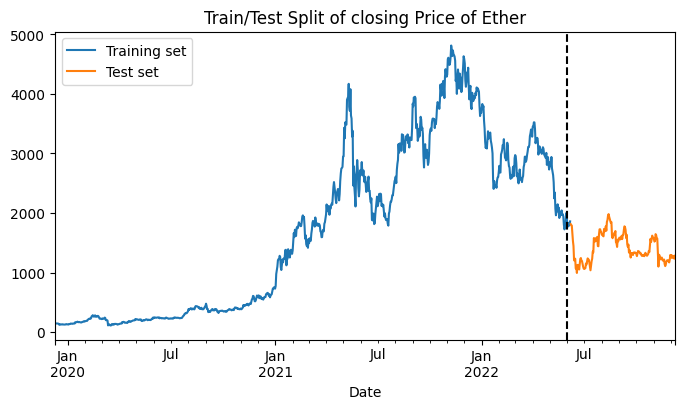

In [30]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
train['Close'].plot(ax=ax, label='Training set')
test['Close'].plot(ax=ax, label='Test set')
ax.legend()
plt.title("Train/Test Split of closing Price of Ether")
ax.axvline('2022-06-01', color='black', ls='--')
plt.show()

Model training

In [38]:
reg = XGBRegressor(n_estimators=33, learning_rate = 0.1)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Accuracy of the train set: {:.3f}".format(reg.score(X_train,y_train)))
print("Accuracy of the test set: {:.3f}".format(reg.score(X_test,y_test)))
print("MSE of the test set: {:.3f}".format(mean_absolute_error(y_test,predictions)))

Accuracy of the train set: 0.994
Accuracy of the test set: 0.875
MSE of the test set: 58.470


<AxesSubplot: xlabel='Date'>

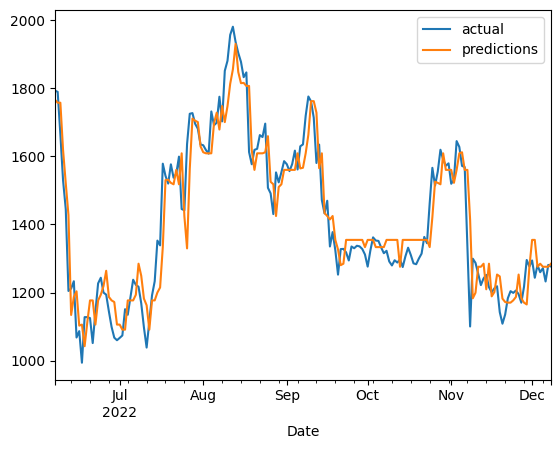

In [39]:
combined = pd.concat([y_test, pd.Series(predictions, index=X_test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined.plot()